# Next Word Prediction:
## Mother Earth

### Importing The Required Libraries:

In [1]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM,GRU,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [2]:
"""
    Dataset: http://www.gutenberg.org/cache/epub/5200/pg5200.txt
    Remove all the unnecessary data and label it as Metamorphosis-clean.
    The starting and ending lines should be as follows.

"""


file = open("C:/Users/Admin/Downloads/Mother_Earth.txt", "r", encoding = "utf8")
lines = []

for i in file:
    lines.append(i)
    
print("The First Line: ", lines[0])
print("The Last Line: ", lines[-1])

The First Line:  THE CHILD AND ITS ENEMIES.

The Last Line:  



### Cleaning the data:

In [3]:
data = ""

for i in lines:
    data = ' '. join(lines)
    
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data[:360]

'THE CHILD AND ITS ENEMIES.  By EMMA GOLDMAN.   Is the child to be considered as an individuality, or as an object to be moulded according to the whims and fancies of those about it? This seems to me to be the most important question to be answered by parents and educators. And whether the child is to grow from within, whether all that craves expression will '

In [4]:
import string

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
new_data = data.translate(translator)

new_data[:500]

'THE CHILD AND ITS ENEMIES   By EMMA GOLDMAN    Is the child to be considered as an individuality  or as an object to be moulded according to the whims and fancies of those about it  This seems to me to be the most important question to be answered by parents and educators  And whether the child is to grow from within  whether all that craves expression will be permitted to come forth toward the light of day  or whether it is to be kneaded like dough through external forces  depends upon the prop'

In [5]:
z = []

for i in data.split():
    if i not in z:
        z.append(i)
        
data = ' '.join(z)
data[:500]

'THE CHILD AND ITS ENEMIES. By EMMA GOLDMAN. Is the child to be considered as an individuality, or object moulded according whims and fancies of those about it? This seems me most important question answered by parents educators. And whether is grow from within, all that craves expression will permitted come forth toward light day; it kneaded like dough through external forces, depends upon proper answer this vital question. The longing best noblest our times makes for strongest individualities. '

### Tokenization:

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]

[5, 30, 7, 222, 449, 88, 450, 89, 31, 5]

In [7]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

4234


In [8]:
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  6435


array([[  5,  30],
       [ 30,   7],
       [  7, 222],
       [222, 449],
       [449,  88],
       [ 88, 450],
       [450,  89],
       [ 89,  31],
       [ 31,   5],
       [  5,  30]])

In [9]:
X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])
    
X = np.array(X)
y = np.array(y)

In [10]:
print("The Data is: ", X[:5])
print("The responses are: ", y[:5])

The Data is:  [  5  30   7 222 449]
The responses are:  [ 30   7 222 449  88]


In [11]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Creating the Model:

In [12]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(GRU(1000, return_sequences=True))
model.add(GRU(1000))
model.add(Dense(1000, activation="tanh"))
model.add(Dense(vocab_size, activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 10)             42340     
                                                                 
 gru (GRU)                   (None, 1, 1000)           3036000   
                                                                 
 gru_1 (GRU)                 (None, 1000)              6006000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 4234)              4238234   
                                                                 
Total params: 14,323,574
Trainable params: 14,323,574
Non-trainable params: 0
_________________________________________________________________


In [14]:
!pip install pydot

In [15]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


### Plot The Model:

In [16]:
import pydot
import graphviz
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Callbacks:

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

### Compile The Model:

In [15]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001),metrics="accuracy")

C:\Users\Admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [16]:
model=model.fit(X, y, epochs=50, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])

Epoch 1/50
101/101 [==============================] - ETA: 0s - loss: 8.3473 - accuracy: 4.6620e-04
Epoch 1: loss improved from inf to 8.34727, saving model to nextword1.h5
101/101 [==============================] - 18s 131ms/step - loss: 8.3473 - accuracy: 4.6620e-04 - lr: 0.0010
Epoch 2/50
101/101 [==============================] - ETA: 0s - loss: 8.3063 - accuracy: 0.0016
Epoch 2: loss improved from 8.34727 to 8.30631, saving model to nextword1.h5
101/101 [==============================] - 11s 109ms/step - loss: 8.3063 - accuracy: 0.0016 - lr: 0.0010
Epoch 3/50
101/101 [==============================] - ETA: 0s - loss: 8.0503 - accuracy: 0.0019
Epoch 3: loss improved from 8.30631 to 8.05032, saving model to nextword1.h5
101/101 [==============================] - 10s 102ms/step - loss: 8.0503 - accuracy: 0.0019 - lr: 0.0010
Epoch 4/50
101/101 [==============================] - ETA: 0s - loss: 7.6780 - accuracy: 0.0039
Epoch 4: loss improved from 8.05032 to 7.67797, saving model to ne

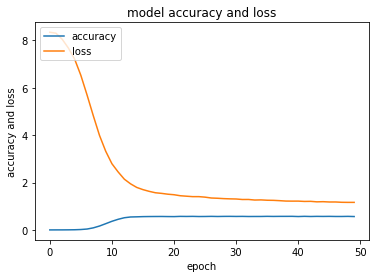

In [17]:
import matplotlib.pyplot as plt
plt.plot(model.history['accuracy'])
plt.plot(model.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [20]:
model.evaluate(X,y)

202/202 [==============================] - 5s 21ms/step - loss: 0.8668 - accuracy: 0.6628


[0.8667892813682556, 0.6627816557884216]

In [22]:
model.save_weights("C:/Users/Admin/Downloads/nextword1.h5")
vocab_array = np.array(list(tokenizer.word_index.keys()))

# Importing the Libraries
from tensorflow.keras.models import load_model
import numpy as np
import pickle
# Load the model and tokenizer
model.load_weights("C:/Users/Admin/Downloads/nextword1.h5")
tokenizer = pickle.load(open("C:/Users/Admin/Downloads/tokenizer1.pkl", 'rb'))
def make_prediction(text, n_words):
    for i in range(n_words):
        text_tokenize = tokenizer.texts_to_sequences([text])
        text_padded = tf.keras.preprocessing.sequence.pad_sequences(text_tokenize, maxlen=14)
        prediction = np.squeeze(np.argmax(model.predict(text_padded), axis=-1))
        prediction = str(vocab_array[prediction - 1])
        print(vocab_array[np.argsort(model.predict(text_padded)) - 1].ravel()[:-3])
        text += " " + prediction
    return text

In [23]:
make_prediction("child",5)


1/1 [==============================] - 0s 56ms/step
['bavaria' 'search' 'shocking' ... 'hopeless' 'bad' 'gates']
1/1 [==============================] - 0s 48ms/step
['bavaria' 'shocking' 'search' ... 'gates' 'hopeless' 'lost']
1/1 [==============================] - 0s 56ms/step
['shocking' 'bavaria' 'polyandry' ... 'can' 'least' 'lost']
1/1 [==============================] - 0s 64ms/step
['shocking' 'bavaria' 'conforming' ... 'well' 'can' 'must']
1/1 [==============================] - 0s 48ms/step
['your' 'conforming' 'shocking' ... 'why' 'existence' 'lost']


'child door must must least least'